## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  66.385079  1125.551250  0.146899  10.271079  1.061612
1  23.308171   467.344491  0.860882   6.752155  1.688171
2  41.055231  1618.540555  0.600711  10.484365  1.610276
3  76.302243   718.456811  0.840225  10.320615  1.453772
4  76.186058   835.516828  0.137508   7.962608  1.059633


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0364435	total: 69.5ms	remaining: 1m 9s
1:	learn: 1.0276366	total: 70.1ms	remaining: 35s
2:	learn: 1.0191806	total: 70.6ms	remaining: 23.5s
3:	learn: 1.0097869	total: 71.3ms	remaining: 17.8s
4:	learn: 0.9987842	total: 71.9ms	remaining: 14.3s
5:	learn: 0.9885515	total: 72.4ms	remaining: 12s
6:	learn: 0.9799217	total: 72.9ms	remaining: 10.3s
7:	learn: 0.9703553	total: 73.3ms	remaining: 9.1s
8:	learn: 0.9586576	total: 73.9ms	remaining: 8.14s
9:	learn: 0.9495371	total: 74.3ms	remaining: 7.36s
10:	learn: 0.9422587	total: 74.9ms	remaining: 6.73s
11:	learn: 0.9312871	total: 75.4ms	remaining: 6.21s
12:	learn: 0.9227809	total: 75.9ms	remaining: 5.76s
13:	learn: 0.9142665	total: 76.3ms	remaining: 5.38s
14:	learn: 0.9041391	total: 76.8ms	remaining: 5.04s
15:	learn: 0.8972257	total: 77.2ms	remaining: 4.75s
16:	learn: 0.8864942	total: 77.7ms	remaining: 4.49s
17:	learn: 0.8789993	total: 78.1ms	remaining: 4.26s
18:	learn: 0.8718780	total: 78.5ms	remaining: 4.0

91:	learn: 0.4993325	total: 109ms	remaining: 1.08s
92:	learn: 0.4966066	total: 110ms	remaining: 1.07s
93:	learn: 0.4939306	total: 110ms	remaining: 1.06s
94:	learn: 0.4910368	total: 111ms	remaining: 1.05s
95:	learn: 0.4876571	total: 111ms	remaining: 1.05s
96:	learn: 0.4845703	total: 112ms	remaining: 1.04s
97:	learn: 0.4826400	total: 112ms	remaining: 1.03s
98:	learn: 0.4790635	total: 113ms	remaining: 1.03s
99:	learn: 0.4759379	total: 113ms	remaining: 1.02s
100:	learn: 0.4724041	total: 114ms	remaining: 1.01s
101:	learn: 0.4699419	total: 114ms	remaining: 1s
102:	learn: 0.4670479	total: 115ms	remaining: 998ms
103:	learn: 0.4641005	total: 115ms	remaining: 990ms
104:	learn: 0.4615258	total: 115ms	remaining: 984ms
105:	learn: 0.4587064	total: 116ms	remaining: 976ms
106:	learn: 0.4557594	total: 116ms	remaining: 969ms
107:	learn: 0.4532989	total: 116ms	remaining: 962ms
108:	learn: 0.4503154	total: 117ms	remaining: 956ms
109:	learn: 0.4468703	total: 117ms	remaining: 948ms
110:	learn: 0.4435068	to

268:	learn: 0.2090562	total: 186ms	remaining: 507ms
269:	learn: 0.2080807	total: 187ms	remaining: 505ms
270:	learn: 0.2074306	total: 187ms	remaining: 504ms
271:	learn: 0.2068246	total: 188ms	remaining: 503ms
272:	learn: 0.2061882	total: 188ms	remaining: 501ms
273:	learn: 0.2055978	total: 189ms	remaining: 500ms
274:	learn: 0.2047428	total: 189ms	remaining: 499ms
275:	learn: 0.2038599	total: 190ms	remaining: 497ms
276:	learn: 0.2033562	total: 190ms	remaining: 496ms
277:	learn: 0.2028170	total: 190ms	remaining: 494ms
278:	learn: 0.2020008	total: 191ms	remaining: 493ms
279:	learn: 0.2011609	total: 191ms	remaining: 492ms
280:	learn: 0.2003472	total: 192ms	remaining: 490ms
281:	learn: 0.1997343	total: 192ms	remaining: 489ms
282:	learn: 0.1988885	total: 193ms	remaining: 488ms
283:	learn: 0.1981060	total: 193ms	remaining: 486ms
284:	learn: 0.1972554	total: 193ms	remaining: 485ms
285:	learn: 0.1967028	total: 194ms	remaining: 484ms
286:	learn: 0.1961547	total: 194ms	remaining: 483ms
287:	learn: 

501:	learn: 0.1006145	total: 291ms	remaining: 289ms
502:	learn: 0.1003465	total: 292ms	remaining: 288ms
503:	learn: 0.0999368	total: 292ms	remaining: 288ms
504:	learn: 0.0997273	total: 293ms	remaining: 287ms
505:	learn: 0.0994646	total: 293ms	remaining: 286ms
506:	learn: 0.0990694	total: 294ms	remaining: 285ms
507:	learn: 0.0986846	total: 294ms	remaining: 285ms
508:	learn: 0.0984326	total: 294ms	remaining: 284ms
509:	learn: 0.0979912	total: 295ms	remaining: 283ms
510:	learn: 0.0976367	total: 295ms	remaining: 282ms
511:	learn: 0.0972967	total: 296ms	remaining: 282ms
512:	learn: 0.0970202	total: 296ms	remaining: 281ms
513:	learn: 0.0966187	total: 297ms	remaining: 280ms
514:	learn: 0.0962788	total: 297ms	remaining: 280ms
515:	learn: 0.0960112	total: 297ms	remaining: 279ms
516:	learn: 0.0956242	total: 298ms	remaining: 278ms
517:	learn: 0.0953637	total: 298ms	remaining: 278ms
518:	learn: 0.0951107	total: 299ms	remaining: 277ms
519:	learn: 0.0948507	total: 299ms	remaining: 276ms
520:	learn: 

674:	learn: 0.0652633	total: 369ms	remaining: 178ms
675:	learn: 0.0651305	total: 369ms	remaining: 177ms
676:	learn: 0.0650717	total: 370ms	remaining: 176ms
677:	learn: 0.0648023	total: 370ms	remaining: 176ms
678:	learn: 0.0647493	total: 371ms	remaining: 175ms
679:	learn: 0.0646183	total: 371ms	remaining: 175ms
680:	learn: 0.0643286	total: 371ms	remaining: 174ms
681:	learn: 0.0640385	total: 372ms	remaining: 173ms
682:	learn: 0.0639863	total: 372ms	remaining: 173ms
683:	learn: 0.0638580	total: 373ms	remaining: 172ms
684:	learn: 0.0635744	total: 373ms	remaining: 172ms
685:	learn: 0.0633191	total: 373ms	remaining: 171ms
686:	learn: 0.0631613	total: 374ms	remaining: 170ms
687:	learn: 0.0629669	total: 374ms	remaining: 170ms
688:	learn: 0.0628929	total: 375ms	remaining: 169ms
689:	learn: 0.0627366	total: 375ms	remaining: 168ms
690:	learn: 0.0625012	total: 375ms	remaining: 168ms
691:	learn: 0.0622572	total: 376ms	remaining: 167ms
692:	learn: 0.0620704	total: 376ms	remaining: 167ms
693:	learn: 

913:	learn: 0.0339036	total: 474ms	remaining: 44.6ms
914:	learn: 0.0338676	total: 475ms	remaining: 44.1ms
915:	learn: 0.0338357	total: 475ms	remaining: 43.6ms
916:	learn: 0.0338131	total: 476ms	remaining: 43ms
917:	learn: 0.0336609	total: 476ms	remaining: 42.5ms
918:	learn: 0.0335573	total: 476ms	remaining: 42ms
919:	learn: 0.0334800	total: 477ms	remaining: 41.5ms
920:	learn: 0.0334628	total: 477ms	remaining: 40.9ms
921:	learn: 0.0333537	total: 478ms	remaining: 40.4ms
922:	learn: 0.0333314	total: 478ms	remaining: 39.9ms
923:	learn: 0.0332552	total: 478ms	remaining: 39.3ms
924:	learn: 0.0332382	total: 479ms	remaining: 38.8ms
925:	learn: 0.0331251	total: 479ms	remaining: 38.3ms
926:	learn: 0.0330750	total: 480ms	remaining: 37.8ms
927:	learn: 0.0329269	total: 480ms	remaining: 37.2ms
928:	learn: 0.0328780	total: 480ms	remaining: 36.7ms
929:	learn: 0.0327977	total: 481ms	remaining: 36.2ms
930:	learn: 0.0327025	total: 481ms	remaining: 35.7ms
931:	learn: 0.0325862	total: 482ms	remaining: 35.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

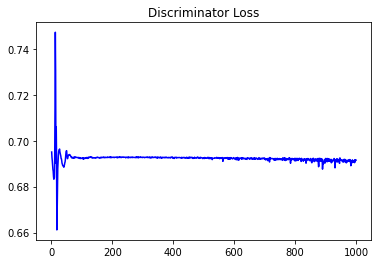

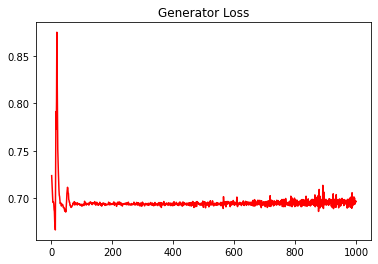

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.19703091318233482


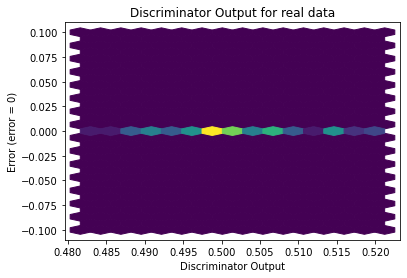

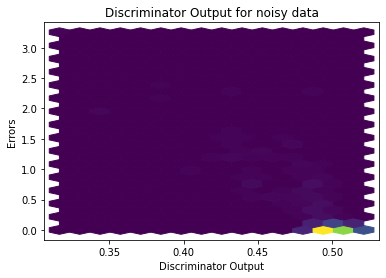

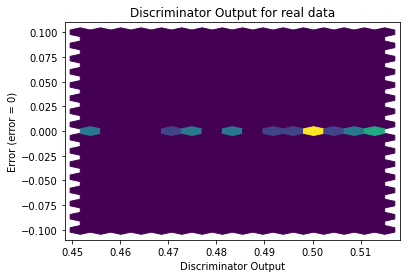

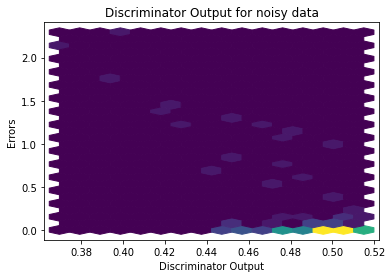

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


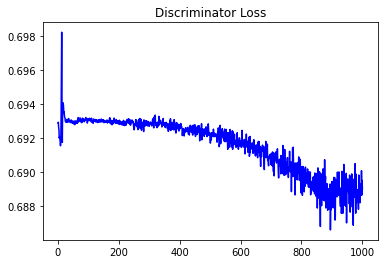

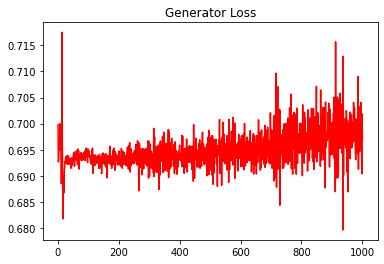

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.15626808168423093


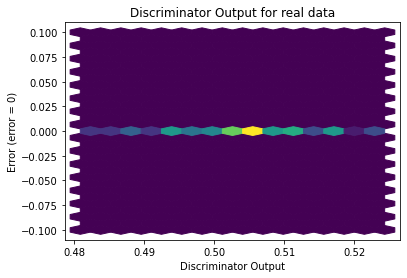

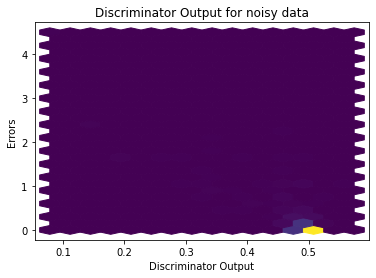

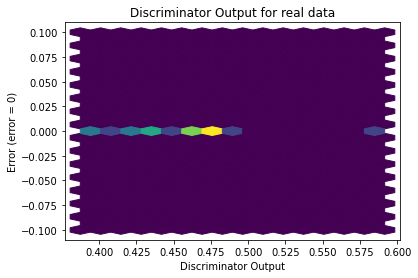

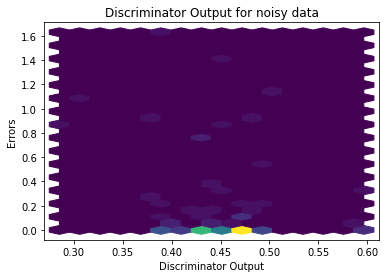

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1569]], requires_grad=True)
